<a href="https://colab.research.google.com/github/shilpa-23/Main-Project/blob/main/DDoS_ORG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_orginal = pd.read_csv("/content/drive/MyDrive/DDoSdata.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df = df_orginal.copy()

In [ ]:
df.head()

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [ ]:
df.rename(columns = {'mean':'average_dur', 'stddev':'stddev_dur', 
                              'sum':'total_dur','min':'min_dur','max':'max_dur'}, inplace = True) 

In [ ]:
df.proto.unique()

array(['tcp', 'arp', 'udp', 'icmp', 'ipv6-icmp'], dtype=object)

In [ ]:
df_ml = df.copy()

In [ ]:
df.drop(['Unnamed: 0','pkSeqID'], axis=1, inplace=True)

In [ ]:
df.drop(['flgs', 'flgs_number'], axis=1, inplace=True)

In [ ]:
df.drop(['stime', 'ltime'], axis=1, inplace=True)

In [ ]:
df = df[df.proto != 'icmp']

In [ ]:
df["sport"] = pd.to_numeric(df['sport'])
df["dport"] = pd.to_numeric(df['dport'])

In [ ]:
df.sport.dtype

dtype('int64')

In [ ]:
df.drop(['state_number'], axis=1, inplace=True)

In [ ]:
df.dport.dtype

dtype('int64')

In [ ]:
df.drop(['seq'], axis=1, inplace=True)

In [ ]:
df.to_csv(r'basic_cleaned.csv')

In [ ]:
df_ml = df.copy()

In [ ]:
df_ml.drop(['proto', 'proto_number', 'saddr', 'sport', 'daddr', 'dport','state','category', 'subcategory',], axis=1, inplace=True)

In [ ]:
df_ml.to_csv(r'ml_dataset.csv')

In [ ]:
df_ml.head()

,pkts,bytes,dur,average_dur,stddev_dur,total_dur,min_dur,max_dur,spkts,dpkts,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,10,1729,6.406424,0.679473,0.544126,1.358946,0.135347,1.223599,6,4,...,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1
1,10,1604,6.405851,0.679572,0.544197,1.359144,0.135375,1.223769,6,4,...,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1
2,8,1708,6.401038,1.110847,1.110847,2.221694,0.000000,2.221694,5,3,...,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1
3,8,1462,6.400703,1.113328,1.113328,2.226655,0.000000,2.226655,5,3,...,700,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1
4,8,1296,6.400472,1.113098,1.113098,2.226195,0.000000,2.226195,5,3,...,700,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1


In [ ]:
df_ml.describe()

,pkts,bytes,dur,average_dur,stddev_dur,total_dur,min_dur,max_dur,spkts,dpkts,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06,...,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06,1.927085e+06
mean,7.913864e+00,1.126113e+03,1.484887e+01,2.549113e+00,9.451324e-01,7.256802e+00,1.301614e+00,3.348263e+00,7.448783e+00,4.650807e-01,...,7.340726e+02,1.337964e+00,1.806929e+00,9.988558e+01,8.194465e+01,8.421063e-01,1.418527e+00,6.771695e+02,5.742009e+02,9.997525e-01
std,1.591981e+02,1.548957e+05,1.238461e+01,1.404563e+00,7.518481e-01,8.140807e+00,1.491021e+00,1.647105e+00,1.061683e+02,6.849927e+01,...,8.333706e+02,8.717321e+01,2.242328e+02,2.613227e+00,2.422740e+01,6.318307e+01,6.320720e+01,5.036672e+02,4.717016e+02,1.573096e-02
min,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.000000e+00,4.200000e+02,1.212148e+01,2.015787e+00,1.228950e-01,4.532602e+00,0.000000e+00,3.260394e+00,4.000000e+00,0.000000e+00,...,5.000000e+02,3.594890e-01,3.703380e-01,1.000000e+02,6.800000e+01,3.502680e-01,3.703120e-01,3.650000e+02,2.690000e+02,1.000000e+00
50%,7.000000e+00,6.160000e+02,1.368343e+01,2.759683e+00,9.375680e-01,8.116730e+00,1.695630e-01,4.057629e+00,6.000000e+00,0.000000e+00,...,6.820000e+02,5.410290e-01,5.497720e-01,1.000000e+02,9.700000e+01,5.437660e-01,5.496870e-01,6.270000e+02,5.000000e+02,1.000000e+00
75%,1.000000e+01,7.800000e+02,1.454814e+01,3.659847e+00,1.690047e+00,1.052096e+01,2.763412e+00,4.172464e+00,9.000000e+00,0.000000e+00,...,9.520000e+02,7.588950e-01,7.534480e-01,1.000000e+02,1.000000e+02,7.285200e-01,7.533360e-01,9.480000e+02,7.840000e+02,1.000000e+00
max,7.005700e+04,7.183334e+07,1.940859e+03,4.981882e+00,2.496763e+00,1.913194e+03,4.980471e+00,4.999999e+00,3.502900e+04,3.502900e+04,...,2.444250e+05,8.695650e+04,1.818180e+05,1.000000e+02,1.000000e+02,8.695650e+04,8.695650e+04,1.125440e+05,1.179390e+05,1.000000e+00


In [ ]:
pip install smote_variants

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 5.6 MB/s 
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=e15f4f85d12f0539f09d5f5a47f97ba84706ac6dd2026c7bf77751460f2dd6c3
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7454 sha256=d5d1a9b17e9bef4f003e074d2d151ec3ca05d5fe71c724b47cbadd94f686dfdc
  Stored in directory: /root/.cache/pip/wheels/37/09/e1/49ee45c0ce248a6e9c986aae82d32bbcba09c9f3b9d0c3406a
Successfully built minisom statistics


In [ ]:
pip install imbalanced_databases

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 5.1 MB/s 


In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import smote_variants as sv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE

%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
df_train = pd.read_csv('/content/ml_dataset.csv')

In [ ]:
df = df_train.copy()
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [ ]:
df_attack = df[df['attack'] == 1]

In [ ]:
df_normal = df[df['attack'] == 0]

1    1926608
0        477
Name: attack, dtype: int64

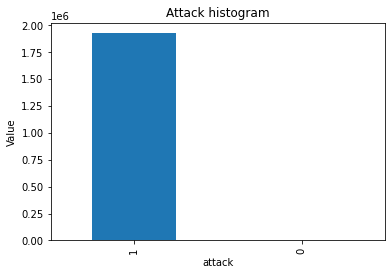

In [ ]:
pd.value_counts(df['attack']).plot.bar()
plt.title('Attack histogram')
plt.xlabel('attack')
plt.ylabel('Value')
df['attack'].value_counts()

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# Used for classification of dataset.
def classif_results(): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))

  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)

# Used for splitting and normalizing dataset.


In [ ]:
X = df.iloc[:, df.columns != 'attack']
y = df.iloc[:, df.columns == 'attack']
X, y = SMOTE().fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.4, random_state =0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Confusion matrix:
 [[771021    363]
 [   902 769001]]


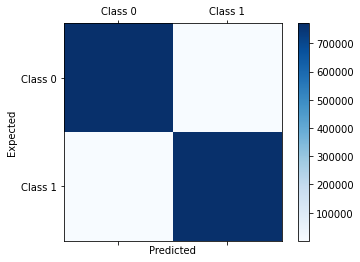

Accuracy 0.9991792573349415
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    771384
           1       1.00      1.00      1.00    769903

    accuracy                           1.00   1541287
   macro avg       1.00      1.00      1.00   1541287
weighted avg       1.00      1.00      1.00   1541287

AUC Score: 
0.9991789205478125


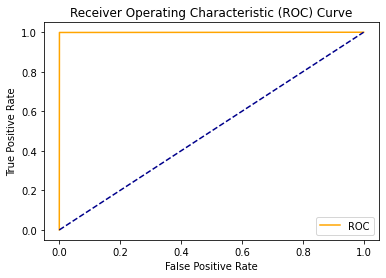

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=0,max_depth=1, min_samples_leaf=2)   
clf_model.fit(X_train,y_train)
y_pred = clf_model.predict(X_test)
classif_results()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix:
 [[578600      0]
 [   615 576750]]


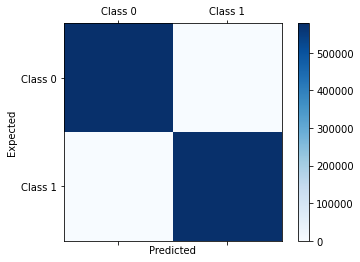

Accuracy 0.9994679769716212
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    578600
           1       1.00      1.00      1.00    577365

    accuracy                           1.00   1155965
   macro avg       1.00      1.00      1.00   1155965
weighted avg       1.00      1.00      1.00   1155965

AUC Score: 
0.9994674079654984


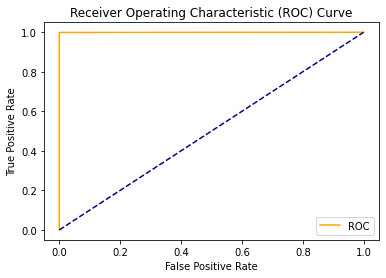

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state =0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
classif_results()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion matrix:
 [[523615  54985]
 [   111 577254]]


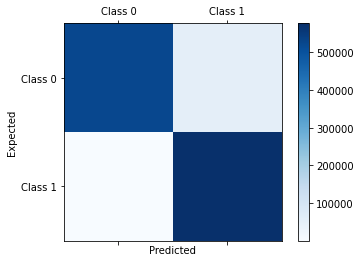

Accuracy 0.9523376572820111
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    578600
           1       0.91      1.00      0.95    577365

    accuracy                           0.95   1155965
   macro avg       0.96      0.95      0.95   1155965
weighted avg       0.96      0.95      0.95   1155965

AUC Score: 
0.9523883188453793


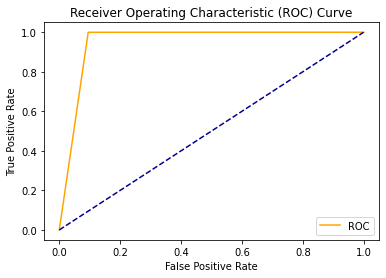

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10,max_depth=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classif_results()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix:
 [[578600      0]
 [    45 577320]]


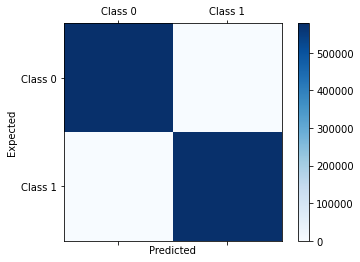

Accuracy 0.9999610714857283
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    578600
           1       1.00      1.00      1.00    577365

    accuracy                           1.00   1155965
   macro avg       1.00      1.00      1.00   1155965
weighted avg       1.00      1.00      1.00   1155965

AUC Score: 
0.9999610298511341


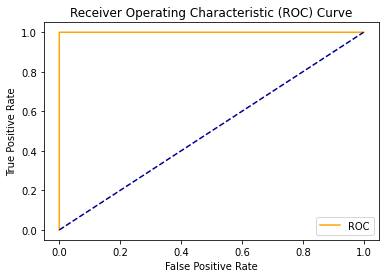

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
classif_results()

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
model1 = SVC()
model2 =GaussianNB () 
model3=DecisionTreeClassifier()
model4=RandomForestClassifier()
model = VotingClassifier(estimators=[('sv',model1),('na', model2),('dc',model3),('rf',model4)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9999610714857283